In [361]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread, imsave
from skimage.morphology import  opening, closing, dilation, erosion, disk, square
from skimage.color import rgba2rgb, rgb2gray, gray2rgb
from skimage.filters import difference_of_gaussians, threshold_otsu

# TODO
essayer d'eclaircir les bords

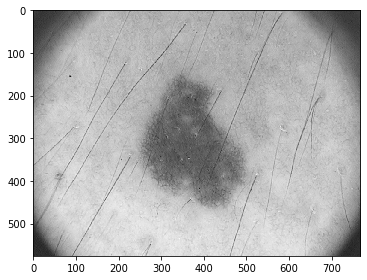

In [362]:
#original = imread('abbas_images/dog.png')
original = imread('ph2-dataset/IMD384.bmp')
gray = rgb2gray(original)
imshow(gray,cmap='gray')
plt.show()

# Dog

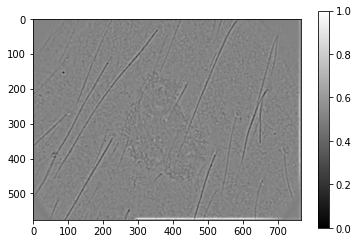

In [363]:
dog = difference_of_gaussians(gray, low_sigma=2)
dog = (dog - np.min(dog))
dog = dog/np.max(dog)
plt.imshow(dog, cmap='gray')
plt.colorbar()
plt.show()

# Binary mask creation
using otsu


thresh=0.509765625


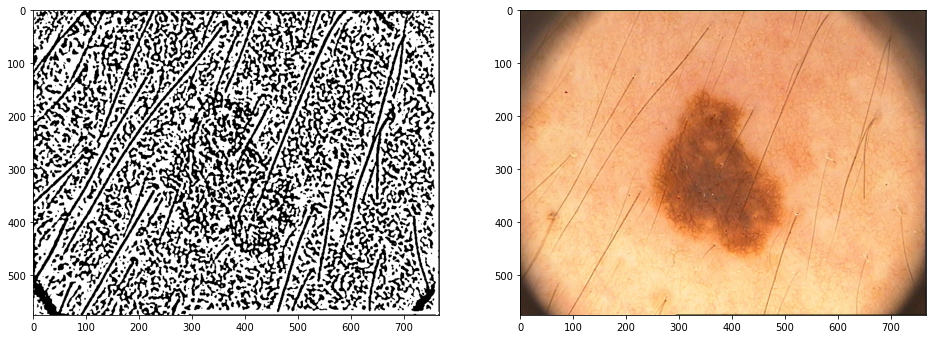

In [366]:
thresh = threshold_otsu(dog)
print(f"{thresh=}")
THRESH =thresh
binary = dog.copy()
binary[binary < THRESH] = 0
binary[binary >= THRESH] = 1
fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].imshow(binary, cmap='gray')
ax[1].imshow(original, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


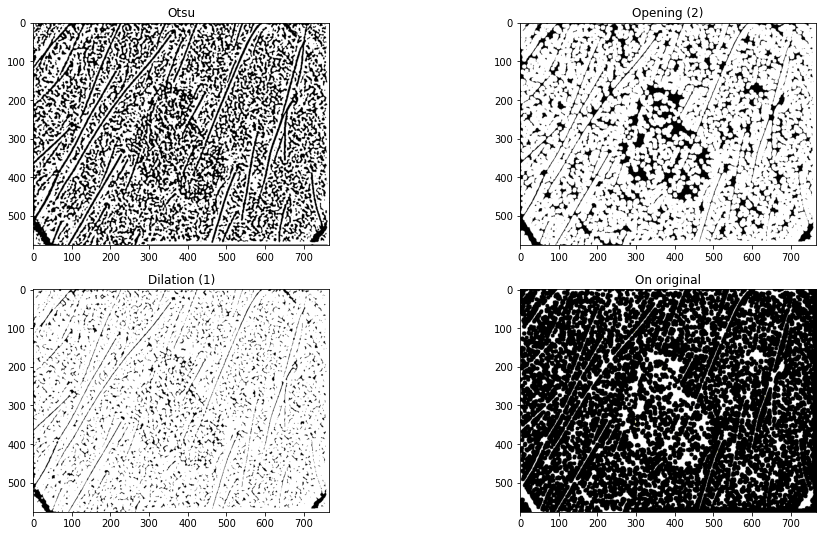

In [370]:
structural_el1 = disk(2)
structural_el2 = disk(5)
# square_el = square(2)
im1 = dilation(binary, structural_el1)
im2 = opening(im1, structural_el2)



fig,ax = plt.subplots(2,2,figsize=(16,9))


ax[0][0].imshow(binary, cmap='gray')
ax[0][0].set_title('Otsu')

ax[1][0].imshow(im1, cmap='gray')
ax[1][0].set_title('Dilation (1)')

ax[0][1].imshow(im2, cmap='gray')
ax[0][1].set_title('Opening (2)')


im2 = 1-im2
# shows on original
im2 = gray2rgb(im2)
tmp = im2*original
ax[1][1].imshow(tmp)
ax[1][1].set_title('On original')
plt.show()

# e --> f

For this :
    * Circularity condition + area opening
    * 